In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('runs_data_all.csv', index_col=0)

In [2]:
for ind in df.index:
    if np.isnan(df['performance metrics/accuracy'][ind]):
        df['performance metrics/accuracy'][ind] =  df['performance metrics svm/accuracy'][ind]
        df['performance metrics/precision'][ind] =  df['performance metrics svm/precision'][ind]
        df['performance metrics/recall'][ind] =  df['performance metrics svm/recall'][ind]
        df['performance metrics/roc'][ind] =  df['performance metrics svm/roc'][ind]



<ipython-input-2-9280b41cd088>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['performance metrics/accuracy'][ind] =  df['performance metrics svm/accuracy'][ind]
<ipython-input-2-9280b41cd088>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['performance metrics/precision'][ind] =  df['performance metrics svm/precision'][ind]
<ipython-input-2-9280b41cd088>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['performance metrics

In [3]:
df = df.drop(columns=['performance metrics svm/accuracy',	'performance metrics svm/precision',	'performance metrics svm/recall',	'performance metrics svm/roc',"performance metrics xgb/accuracy",	'performance metrics xgb/precision',	'performance metrics xgb/recall',	'performance metrics xgb/roc']).reset_index(drop=True)
df.columns=['name', 'runtime', 'accuracy', 'precision', 'recall', 'roc', 'cpu', 'gpu', 'gpu_memory', 'memory']
df=df.fillna(0)
df['f1'] = 'empty'
df = df[['name', 'runtime', 'accuracy', 'precision', 'recall', 'f1', 'roc', 'cpu', 'gpu', 'gpu_memory', 'memory']]
df

,name,runtime,accuracy,precision,recall,f1,roc,cpu,gpu,gpu_memory,memory
0,baseline_dank_full,0.631,0.553333,0.568154,0.554118,empty,0.553309,0.000000,0.0,0.000122,0.461651
1,baseline_dank_half,0.702,0.562424,0.583333,0.540984,empty,0.563205,0.000000,0.0,0.000122,0.462009
2,baseline_imdb,10.703,0.896485,0.890140,0.905813,empty,0.896437,63.782144,0.0,0.128906,0.462017
3,baseline_medium_full,0.655,0.856364,0.859320,0.862353,empty,0.856176,0.000000,0.0,0.000122,0.461704
4,baseline_medium_half,0.613,0.847273,0.841121,0.861244,empty,0.847084,0.000000,0.0,0.000122,0.461510
5,baseline_short_full,0.715,0.982580,0.982143,0.887097,empty,0.942290,0.000000,0.0,0.000122,0.461658
6,baseline_short_half,0.550,0.978237,0.991453,0.859259,empty,0.928992,0.000000,0.0,0.000122,0.461693
7,conv_dank_full_size,10.503,0.552000,0.538576,0.726000,empty,0.552000,52.785278,63.0,0.506226,0.484005
8,conv_dank_half,0.589,0.544000,0.536765,0.588710,empty,0.544355,0.000000,0.0,0.000122,0.451447
9,conv_full_imdb,183.049,0.861100,0.825893,0.917841,empty,0.860654,59.429956,68.0,5.095703,0.454185


In [4]:
for ind in df.index:
    if df['f1'][ind] == 'empty':
        f1_score = 2*(df['precision'][ind] * df['recall'][ind])/(df['precision'][ind]+df['recall'][ind])
        df['f1'][ind] = f1_score

<ipython-input-4-1fd9e960e8ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['f1'][ind] = f1_score


In [5]:
df.to_excel('runs_clean_data_svm.xlsx', index=False)

# Radar chart based on [this article](https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca)

In [25]:
import plotly.graph_objects as go
import plotly.offline as pyo

In [63]:
categories = ['accuracy', 'precision', 'recall', 'roc']
categories = [*categories, categories[0]]

conv_dank = convnet_performance.loc['conv_dank_full_size'].tolist()
conv_short = convnet_performance.loc['conv_short_full_size'].tolist()
conv_medium = convnet_performance.loc['conv_medium_full_size'].tolist()

conv_short = [*conv_short, conv_short[0]]
conv_dank = [*conv_dank, conv_dank[0]]
conv_medium = [*conv_medium, conv_medium[0]]

In [68]:

fig = go.Figure(
    data=[
        go.Scatterpolar(r=conv_dank, theta=categories,  name='dank'),
        go.Scatterpolar(r=conv_medium, theta=categories, name='medium'),
        go.Scatterpolar(r=conv_short, theta=categories, name='short')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='performance on different datasets'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)
pyo.plot(fig)


'temp-plot.html'

# Now with matplotlib

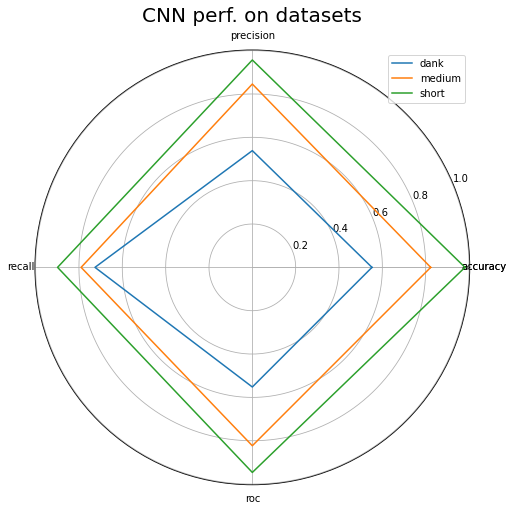

In [74]:
import numpy as np
import matplotlib.pyplot as plt
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(conv_dank   ))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, conv_dank, label='dank')
plt.plot(label_loc, conv_medium, label='medium')
plt.plot(label_loc, conv_short, label='short')
plt.title('CNN perf. on datasets', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()